<a href="https://colab.research.google.com/github/Aljes2310/Temperature_CMEMS_opendap/blob/main/Temperatura_Copernicus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Acceso Remoto Datos Temperatura CMEMS**

<font size="3">El siguiente notebook contiene codigo para acceder a los modelos de CMEMS usando OPENDAP, filtrar y visualizar los datos</font>


<font > 1. Instalar los paquetes a utilizar en esta notebook, recuerda que se instalan cada 24 horas desde que dejaste de usar colab </font>

In [ ]:
!pip install pydap xarray cartopy cmocean

2. Cargamos los paquetes a utilizar

In [ ]:
from IPython.display import IFrame
%matplotlib inline
import matplotlib.pyplot as plt
import pydap
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

3. Colocamos las credenciales de nuestra cuenta de Copernicus

In [ ]:
USERNAME = str(input("Usuario: "))
PASSWORD = str(input("Contraseña: "))

Usuario: aalvarado
Contraseña: Ahorapes45


4. Cargamos la funcion que nos conectara con los datos

In [ ]:

## OPeNDAP connection
def copernicusmarine_datastore(dataset, username, password):
    from pydap.client import open_url
    from pydap.cas.get_cookies import setup_session
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(cas_url, username, password)
    try:
        session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    except:
        print("Bad credentials. Please try again.")
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    return data_store

5. Colocamos el id del dataset que queremos acceder a sus datos. Copialo sin usar el icono de copiado.


In [ ]:
## Coloca el nombre del dataset que copiaste
datasetID = "cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m"

dataset_connection = copernicusmarine_datastore(datasetID, USERNAME, PASSWORD)

6. Accedemos a los datos y guardamos la conexion con el dataset en una variable llamada DS

In [ ]:
DS = xr.open_dataset(dataset_connection)
DS

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 1041)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2020-11-01T12:00:00 ... 2023-08-28T12:00:00
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes:
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    area:         Global
    Conventions:  CF-1.8
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    contact:      https://marine.copernicus.eu/contact
    references:   http://marine.copernicus.eu
    source:       MOI GLO12
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    institution:  Mercator Ocean International

7. Observamos los datos e informacion que posee el dataset

In [ ]:
# Variables
DS.data_vars

Data variables:
    thetao   (time, depth, latitude, longitude) float32 ...

In [ ]:
# Dimensiones
DS.coords

Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2020-11-01T12:00:00 ... 2023-08-28T12:00:00

In [ ]:
#profundidades
for i in range(0,DS.depth.shape[0]):
  print(DS.depth[i].values)

0.494025
1.541375
2.645669
3.819495
5.078224
6.440614
7.92956
9.572997
11.405
13.46714
15.81007
18.49556
21.59882
25.21141
29.44473
34.43415
40.34405
47.37369
55.76429
65.80727
77.85385
92.32607
109.7293
130.666
155.8507
186.1256
222.4752
266.0403
318.1274
380.213
453.9377
541.0889
643.5668
763.3331
902.3393
1062.44
1245.291
1452.251
1684.284
1941.893
2225.078
2533.336
2865.703
3220.82
3597.032
3992.484
4405.224
4833.291
5274.784
5727.917


In [ ]:
#Fechas
DS.time

<xarray.DataArray 'time' (time: 1041)>
array(['2020-11-01T12:00:00.000000000', '2020-11-02T12:00:00.000000000',
       '2020-11-03T12:00:00.000000000', ..., '2023-08-26T12:00:00.000000000',
       '2023-08-27T12:00:00.000000000', '2023-08-28T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-11-01T12:00:00 ... 2023-08-28T12:00:00
Attributes:
    long_name:      Time (hours since 1950-01-01)
    standard_name:  time
    axis:           T
    _ChunkSizes:    1024

8. Filtramos los datos segun coordenadas, fechas y profundidad

In [ ]:
#Colocar tu area de estudio
lon_min = -85
lon_max = -68
lat_min = -20.2
lat_max = 0.5

#Coloca periodo de Estudio
Fecha_inicial="2023-08-01"
Fecha_final="2023-08-28"

#Elegimos una Profundidad
Profundidad=0.494025 # No cambiar si deseas los datos a nivel superficial

#APLICAMOS LOS FILTROS
subset = DS[['thetao']].sel(time = slice(Fecha_inicial, Fecha_final), latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max), depth=Profundidad)
subset

<xarray.Dataset>
Dimensions:    (time: 38, latitude: 249, longitude: 205)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.92 -84.83 ... -68.17 -68.08 -68.0
  * latitude   (latitude) float32 -20.17 -20.08 -20.0 ... 0.3333 0.4167 0.5
    depth      float32 0.494
  * time       (time) datetime64[ns] 2023-08-01T12:00:00 ... 2023-08-28T12:00:00
Data variables:
    thetao     (time, latitude, longitude) float32 ...
Attributes:
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    area:         Global
    Conventions:  CF-1.8
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    contact:      https://marine.copernicus.eu/contact
    references:   http://marine.copernicus.eu
    source:       MOI GLO12
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    institution:  Mercator Ocean International

9. Separamos la Fecha que queremos hacer la visualizacion

In [ ]:
#Elige una sola Fecha del grupo de datos que filtramos
Fecha_elegir="2023-08-28"

#filtro
plotear=subset["thetao"].sel(time=Fecha_elegir)[0]   #subset["so"].isel(time=-1)

10. Plotemos el grafico

In [ ]:
#Colocamos un titulo
Titulo= f"Temperatura Superficial (°C) {Fecha_elegir}"

#Intervalo de los valores de temperatura
intervalo=1

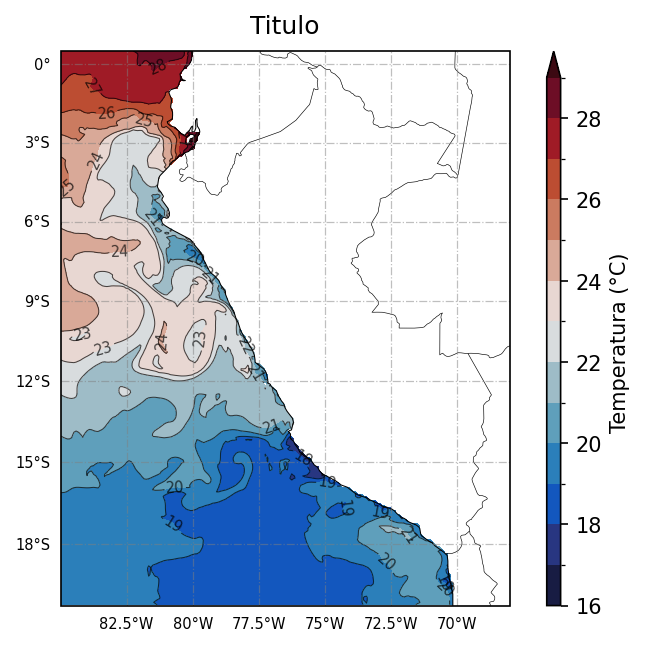

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import math


# Color from cmocean
color = cmocean.cm.balance

#niveles de temperatura para los contour
vmin=math.floor(plotear.min().values+0)
vmax=math.ceil(plotear.max().values+0)
niveles = range(vmin, vmax, intervalo)


#Coordinate Refference System for Map Projection
projection = ccrs.Mercator()

# Specify CRS, that will be used to tell the code, where should our data be plotted
crs = ccrs.PlateCarree()

# Now we will create axes object having specific projection
plt.figure(dpi=150)
ax = plt.axes(projection=projection, frameon=True)

# Gridlines
gl = ax.gridlines(crs=crs, draw_labels=True,
                  linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
gl.xlabel_style = {"size" : 7}
gl.ylabel_style = {"size" : 7}
gl.top_labels = False
gl.right_labels = False

# To plot borders and coastlines, we can use cartopy feature
import cartopy.feature as cf
ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

# crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
cbar_kwargs = {'orientation':'vertical', "pad" : .05, 'aspect':40, 'label':'Temperatura (°C)'}
plotear.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs, levels=niveles, cmap=color)
contours=plotear.plot.contour(ax=ax, transform=ccrs.PlateCarree(), levels=niveles, colors="black", alpha=0.7, linewidths=0.5)

#labels para los contours
plt.clabel(contours, inline=True, fontsize=7)

#titulo
plt.title(f"{Titulo}", y=1.01)

#Guardamos la imagen como png
plt.savefig(f'TSM_{Fecha_elegir}.png')

plt.show()


Tambien podemos exportar nuestros datos a csv

In [ ]:
df=plotear.to_dataframe()
df = df.drop(['depth', "time"], axis=1)
df.dropna()
df.to_csv(f'Temperatura{Fecha_elegir}.csv') #index=false borra las coordenadas
df

thetao
latitude   longitude            
-20.166664 -85.000000  19.860996
           -84.916664  19.878290
           -84.833328  19.913240
           -84.750000  19.913288
           -84.666664  19.891394
...                          ...
 0.500000  -68.333328        NaN
           -68.250000        NaN
           -68.166664        NaN
           -68.083328        NaN
           -68.000000        NaN

[51045 rows x 1 columns]